In [1]:
import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy/')
import field_generator.gaussian1D as g1
import field_generator.gaussian2D as g2
import utils.power_spectrum as spectrum
import matplotlib.pyplot as plt
import numpy as np
import solver.minimal_solver as s
def cubify(scalar_field):
    return np.repeat(scalar_field[:, :, np.newaxis], scalar_field.shape[0], axis=2)

In [2]:
l_max = 2.5
l_min = 0.1
extent = 5
res = 1024//4

k_min = 2 * np.pi / l_max

k_max = 2 * np.pi / l_min


def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 7/3)

field_2d = g2.gaussian2D(k41)
xx,yy,ne = field_2d.domain_fft(l_max, l_min, extent, res)


ne = 1e24 + 2e27* ne


_, wn, ps = spectrum.radial_2Dspectrum(ne, 2*extent, 2*extent)

ps = ps



/rds/general/user/le322/home/anaconda3/envs/MAGPIE_venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/le322/home/anaconda3/envs/MAGPIE_venv/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
print(np.max(ne), np.min(ne))

1.1802842653075484e+24 8.573667099142769e+23


[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 54
    # variables        = 2
    chi-square         = 4.76742614
    reduced chi-square = 0.09168127
    Akaike info crit   = -127.067584
    Bayesian info crit = -123.089616
    R-squared          = 0.98161410
[[Variables]]
    c: -2.32686245 +/- 0.04416123 (1.90%) (init = -1.666667)
    a:  100.700723 +/- 0.12062345 (0.12%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.9398


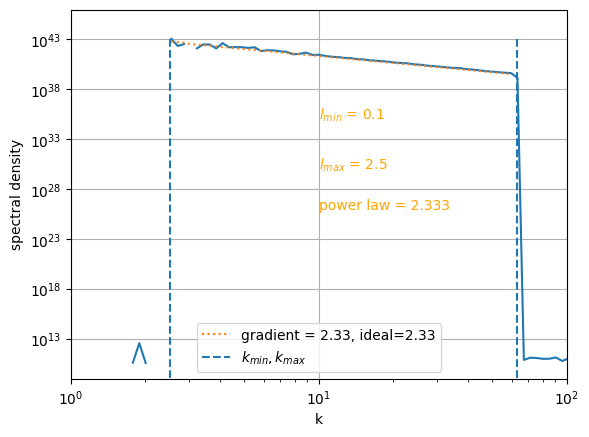

In [7]:


plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(ps > 1e30)[0][0]
max_i = np.where(ps > 1e30)[0][-1]




from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i: max_i], np.exp(res0.best_fit), ':', label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(7/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 1e8, 1e43, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.text(10**1,1e35, f'$l_{{min}}$ = {l_min}', color = 'orange')
plt.text(10**1,1e30, f'$l_{{max}}$ = {l_max}', color = 'orange')
plt.text(10**1,1e26, f'power law = {np.round(7/3, 3)}', color = 'orange')
plt.ylim(1e9,1e46)
plt.xlim(1, 1e2)
plt.grid()
plt.legend()
plt.savefig('/rds/general/user/le322/home/synthPy/output/2D_gen_spec_0.1_2.5_73.png', dpi = 400)
plt.show()

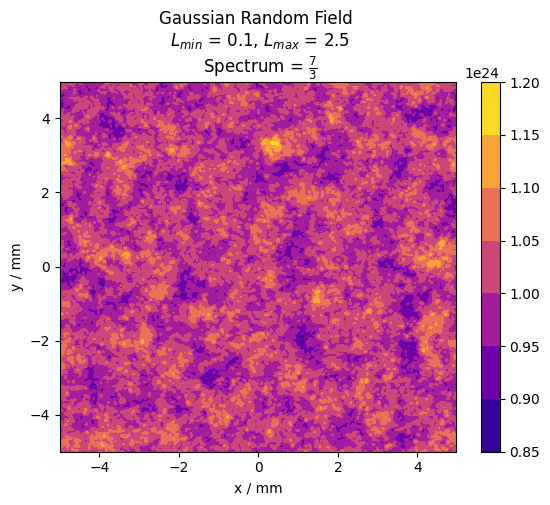

In [8]:
plt.contourf(xx,yy,ne, cmap = 'plasma')
plt.colorbar()
plt.xlabel('x / mm')
plt.ylabel('y / mm')
plt.title(f'Gaussian Random Field \n $L_{{min}}$ = {l_min}, $L_{{max}}$ = {l_max} \n Spectrum = $\\frac{{7}}{{3}}$')
plt.savefig('/rds/general/user/le322/home/synthPy/output/2D_gen_fig_0.1_2.5_73.png', dpi = 400)
plt.show()

In [9]:
x, y, z=  np.linspace(-extent, extent, 2*res), np.linspace(-extent, extent, 2*res), np.linspace(-extent, extent, 2*res)


domain = s.ScalarDomain(x,y,z)

domain.external_ne(cubify(ne))



In [10]:
domain.export_scalar_field(fname = '/rds/general/user/le322/home/synthPy/output/2D_gen_mod_0.1_2.5_73')


VTI saved under /rds/general/user/le322/home/synthPy/output/2D_gen_mod_0.1_2.5_73.vti
Scalar Domain electron density succesfully saved under /rds/general/user/le322/home/synthPy/output/2D_gen_mod_0.1_2.5_73.pvti !


3D GENERATION

In [13]:
import sys

sys.path.insert(1, '/rds/general/user/le322/home/synthPy/')
import field_generator.gaussian3D as g3
import field_generator.gaussian2D as g2
import utils.power_spectrum as spectrum
import matplotlib.pyplot as plt
import numpy as np
import solver.minimal_solver as s

In [15]:

l_max = 5
l_min = 0.01
extent = 5
res = 1024//4

k_min = 2 * np.pi / l_max

k_max = 2 * np.pi / l_min


def power_spectrum(k,a):
    return k**-a

def k41(k):
    return power_spectrum(k, 5/3)

field_3d = g3.gaussian3D(k41)
xx,yy,zz, ne = field_3d.domain_fft(l_max, l_min, extent, res)


ne = 1e24 + 2e27* ne


_, wn, ps = spectrum.radial_3Dspectrum(ne, 2*extent, 2*extent, 2*extent)

ps = ps

/rds/general/user/le322/home/anaconda3/envs/MAGPIE_venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/le322/home/anaconda3/envs/MAGPIE_venv/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[[Model]]
    <lmfit.ExpressionModel('c*x + a')>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 44
    # variables        = 2
    chi-square         = 0.78940857
    reduced chi-square = 0.01879544
    Akaike info crit   = -172.909080
    Bayesian info crit = -169.340700
    R-squared          = 0.99736645
[[Variables]]
    c: -1.65040420 +/- 0.01308607 (0.79%) (init = -1.666667)
    a:  88.2295045 +/- 0.04313780 (0.05%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, a) = -0.8778


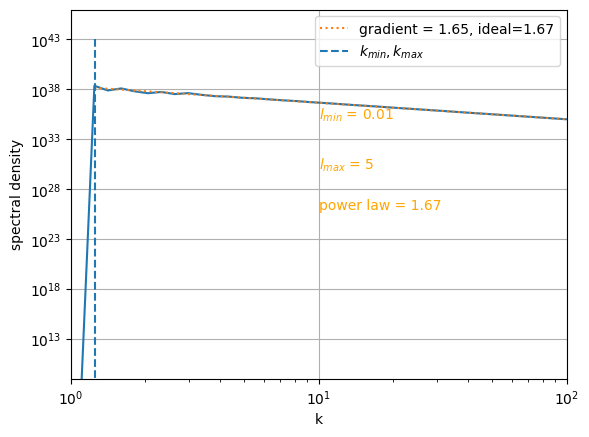

In [20]:
plt.plot(wn, ps)
plt.xscale('log')
plt.yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

min_i = np.where(ps > 1e30)[0][0]
max_i = np.where(ps > 1e30)[0][-1]




from lmfit.models import ExpressionModel
mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i + 1])), x = np.log(wn[min_i : max_i + 1]), nan_policy='omit')
print(res0.fit_report())

plt.plot(wn[min_i: max_i + 1], np.exp(res0.best_fit), ':', label = f"gradient = {np.round(-res0.params['c'].value, 2)}, ideal={np.round(5/3, 2)}")





plt.xlabel('k')
plt.ylabel('spectral density')
plt.vlines([2*np.pi/l_max, 2*np.pi/l_min], 1e8, 1e43, linestyle = 'dashed', label = '$k_{min}, k_{max}$')
plt.text(10**1,1e35, f'$l_{{min}}$ = {l_min}', color = 'orange')
plt.text(10**1,1e30, f'$l_{{max}}$ = {l_max}', color = 'orange')
plt.text(10**1,1e26, f'power law = {np.round(5/3, 2)}', color = 'orange')
plt.ylim(1e9,1e46)
plt.xlim(1, 1e2)
plt.grid()
plt.legend()

plt.show()

In [21]:
x, y, z=  np.linspace(-extent, extent, 2*res), np.linspace(-extent, extent, 2*res), np.linspace(-extent, extent, 2*res)


domain = s.ScalarDomain(x,y,z)

domain.external_ne(ne)

domain.export_scalar_field(fname = './3D_test_field')

VTI saved under ./3D_test_field.vti
Scalar Domain electron density succesfully saved under ./3D_test_field.pvti !
